In [1]:
import pandas as pd
df=pd.read_csv("Reddit_Data.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [10]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [17]:
df.dropna(inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

np.int64(0)

In [4]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category


In [5]:
df = df[df['clean_comment'].str.strip() != '']

In [6]:
df['clean_comment']=df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [9]:
df[df['clean_comment'].str.endswith(' ', na=False) | df['clean_comment'].str.startswith(' ', na=False)]


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [10]:
df['clean_comment']=df['clean_comment'].str.strip()
df[df['clean_comment'].str.endswith(' ', na=False) | df['clean_comment'].str.startswith(' ', na=False)].sum()

clean_comment    0
category         0
dtype: object

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_url = df[df['clean_comment'].str.contains(url_pattern, regex=True, na=False)]
comments_with_url.head()


,clean_comment,category


In [22]:
comments_with_newline = df[df['clean_comment'].str.contains('\n', regex=False, na=False)]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [24]:
df['clean_comment']=df['clean_comment'].str.replace('\n', ' ',regex=True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n', regex=False, na=False)]
comments_with_newline_remaining.shape


(0, 2)

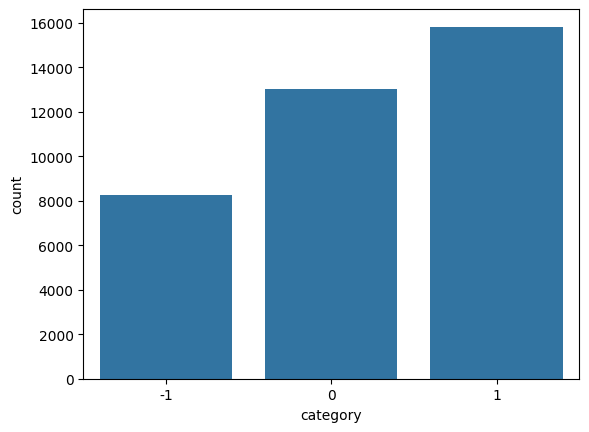

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='category')
plt.show()

In [26]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.64
 0    35.07
-1    22.29
Name: proportion, dtype: float64

In [29]:
df['word_count'] = df['clean_comment'].str.split().str.len()

In [30]:
df.sample(5)

,clean_comment,category,word_count
24736,sensei,0,1.0
23232,thanks for doing this few questions with the n...,1,375.0
28211,was watching geo news and the anchor was telli...,1,29.0
12693,tolerating the chest thumping the low level bj...,-1,34.0
13929,impressive length,1,2.0


In [32]:
df['word_count'].describe()

count    37028.000000
mean        29.499919
std         56.654363
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

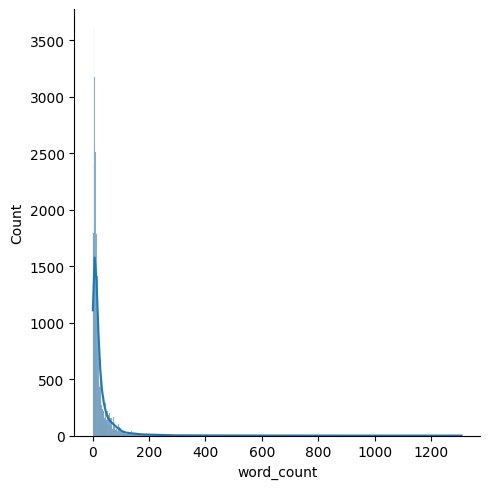

In [33]:
sns.displot(df['word_count'],kde=True)

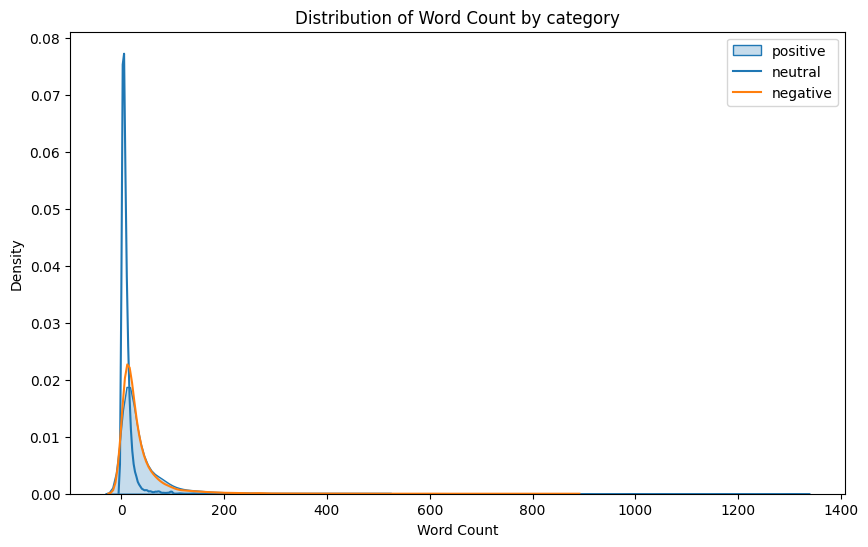

In [34]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category']==1]['word_count'],label='positive',fill=True)
sns.kdeplot(df[df['category']==0]['word_count'],label='neutral')
sns.kdeplot(df[df['category']==-1]['word_count'],label='negative')
plt.title('Distribution of Word Count by category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

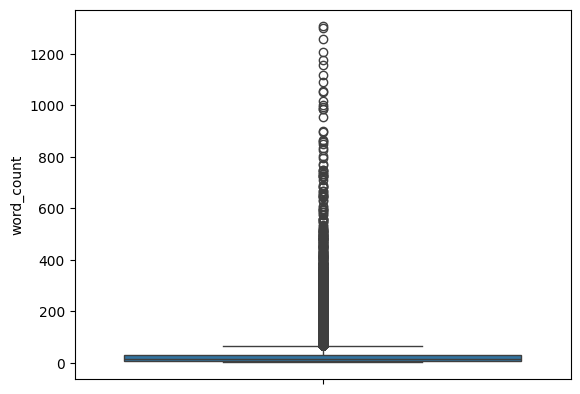

In [41]:
sns.boxplot(df['word_count'])

In [42]:
plt.figure(figsize=(10,6))
plt.boxplot(data=df,x='Category',y='word_count')
plt.title('Word Count Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'y'

<Figure size 1000x600 with 0 Axes>